# Evaluation Project :: Global Power Plant Database

In [4]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets




# Not to display warnings.

import warnings
warnings.filterwarnings('ignore')

### Data Input

In [5]:
# Read the given data set
data=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/powerplan.csv')

In [6]:
## Keeping our raw data safe in 'data' data frame. As we are now going to work with 'df'data frame.

df=data

### Data Analysis

In [7]:
# Head Checking
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [8]:
# Tail Checking
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking the Head & Tril to get an over all Idea about the data.

### First Cut Observations on the Data:

In [10]:
# Understanding the row & column numbers
df.shape

(908, 25)

In [11]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation : Not a Big Data Set to most need to take care the Data Loss Aspect.

In [12]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [13]:
#Checking for missing/null values.
df.isnull().sum()  

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [14]:
# checking the columns of the data
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [15]:
##  Now checking Corelation 
df.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
capacity_mw,1.000000,0.050107,0.198377,NaN,0.294661,NaN,NaN,0.823513,0.850698,0.855834,0.881209,0.896785,NaN
latitude,0.050107,1.000000,0.031501,NaN,0.120944,NaN,NaN,0.050720,0.059826,0.048103,0.040832,0.039711,NaN
longitude,0.198377,0.031501,1.000000,NaN,0.114167,NaN,NaN,0.017461,0.013678,0.023087,0.051128,0.049320,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.294661,0.120944,0.114167,NaN,1.000000,NaN,NaN,0.137351,0.160896,0.171964,0.195301,0.193421,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.823513,0.050720,0.017461,NaN,0.137351,NaN,NaN,1.000000,0.968904,0.908396,0.894752,0.859459,NaN
generation_gwh_2014,0.850698,0.059826,0.013678,NaN,0.160896,NaN,NaN,0.968904,1.000000,0.961105,0.937091,0.912585,NaN
generation_gwh_2015,0.855834,0.048103,0.023087,NaN,0.171964,NaN,NaN,0.908396,0.961105,1.000000,0.974955,0.940274,NaN


In [16]:
df.drop(df.columns[[0, 1,5,6, 8, 9, 10,11,12,13,14,15,16,17,23,24]], axis = 1, inplace = True)

<AxesSubplot:>

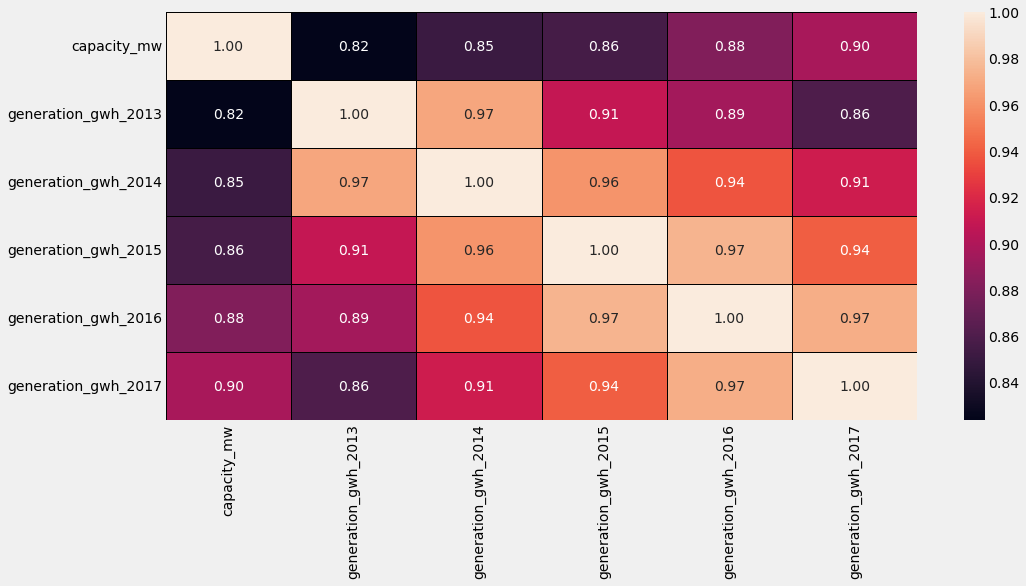

In [17]:
##  Now checking Corelation with the help og Hit Map
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.2f')

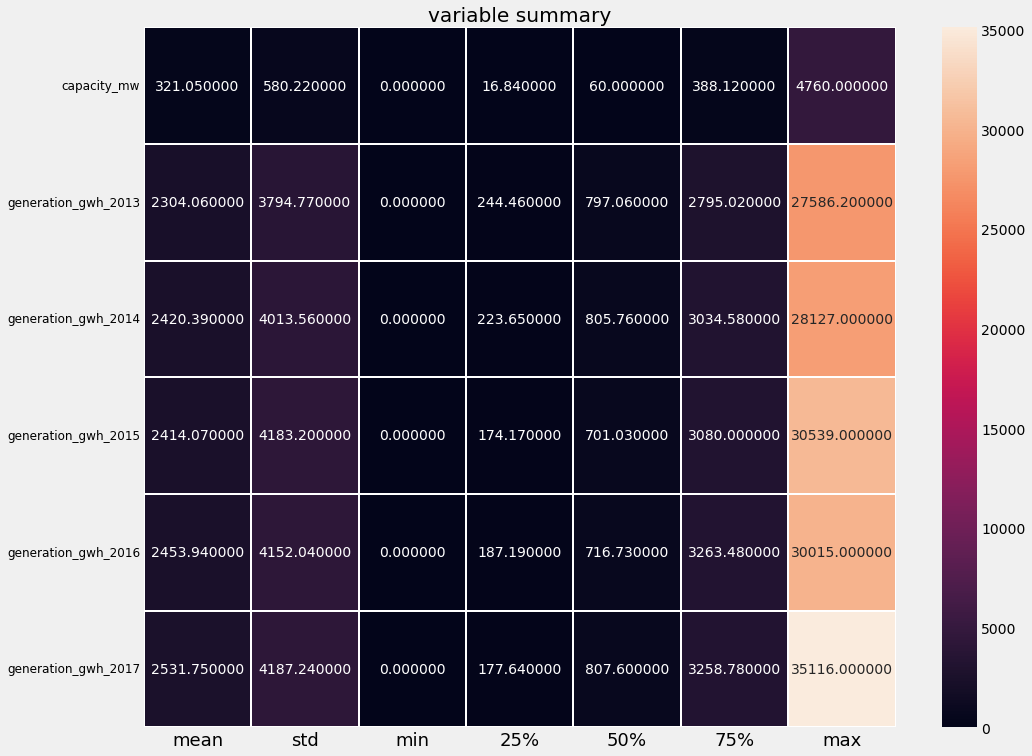

In [18]:
## Need to Check Distributions of Variables with in a hit map.
## Which will give us clear understanding about the variables.

plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

In [19]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,Solar,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,Gas,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,Coal,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [20]:
#Checking for missing/null values.
df.isnull().sum()  

name                     0
gppd_idnr                0
capacity_mw              0
primary_fuel             0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [21]:
column_means = df. mean()
df = df. fillna(column_means)

In [22]:
#Checking for missing/null values.
df.isnull().sum()  

name                   0
gppd_idnr              0
capacity_mw            0
primary_fuel           0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [23]:
# So now checking all the data are in numeric form or Not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   generation_gwh_2013  908 non-null    float64
 5   generation_gwh_2014  908 non-null    float64
 6   generation_gwh_2015  908 non-null    float64
 7   generation_gwh_2016  908 non-null    float64
 8   generation_gwh_2017  908 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.0+ KB


In [24]:
# checking the columns of the data
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

## Enhanced Data Analysis:

In [25]:
#df = df.astype('category')
#df.dtypes

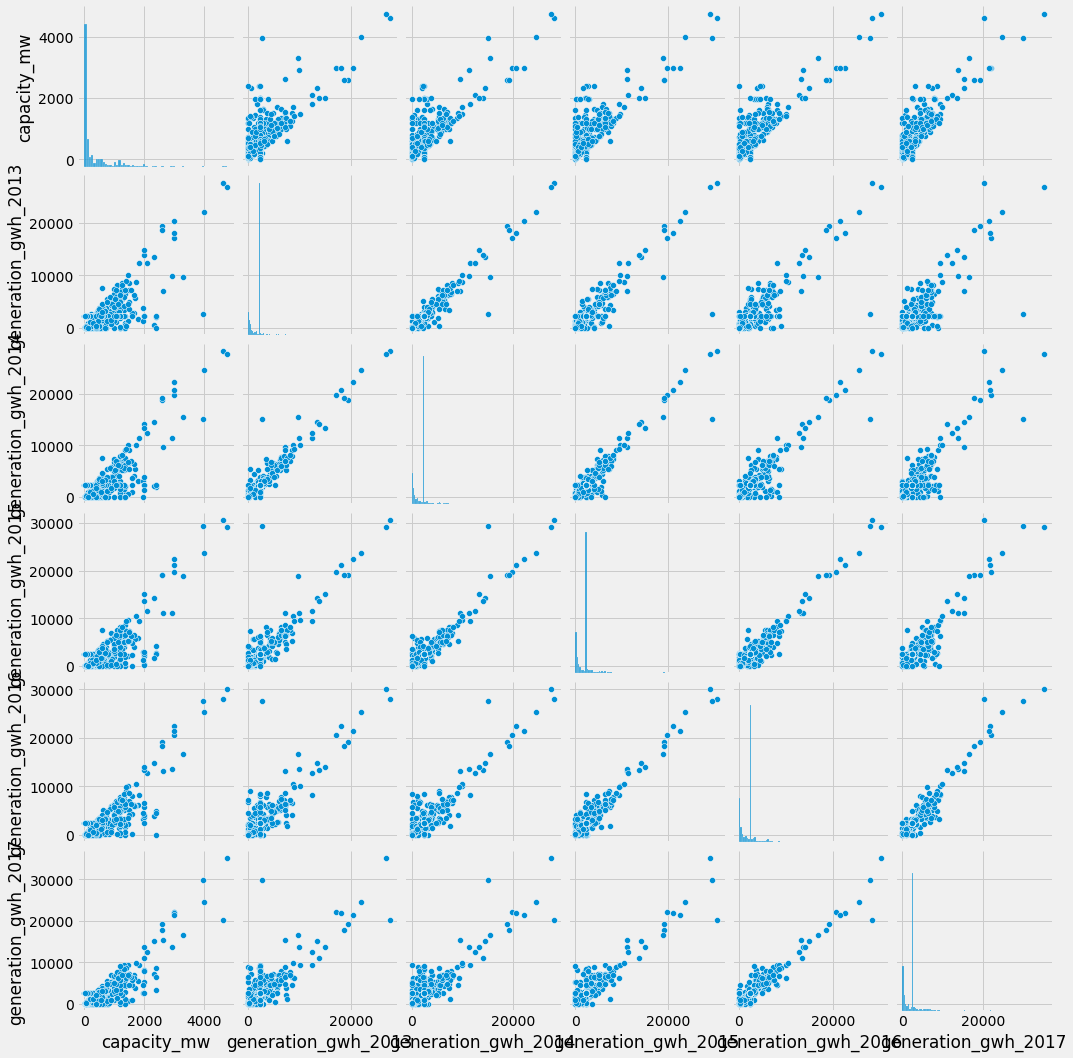

In [26]:
#pairplot
import seaborn as sns
sns.pairplot(df)

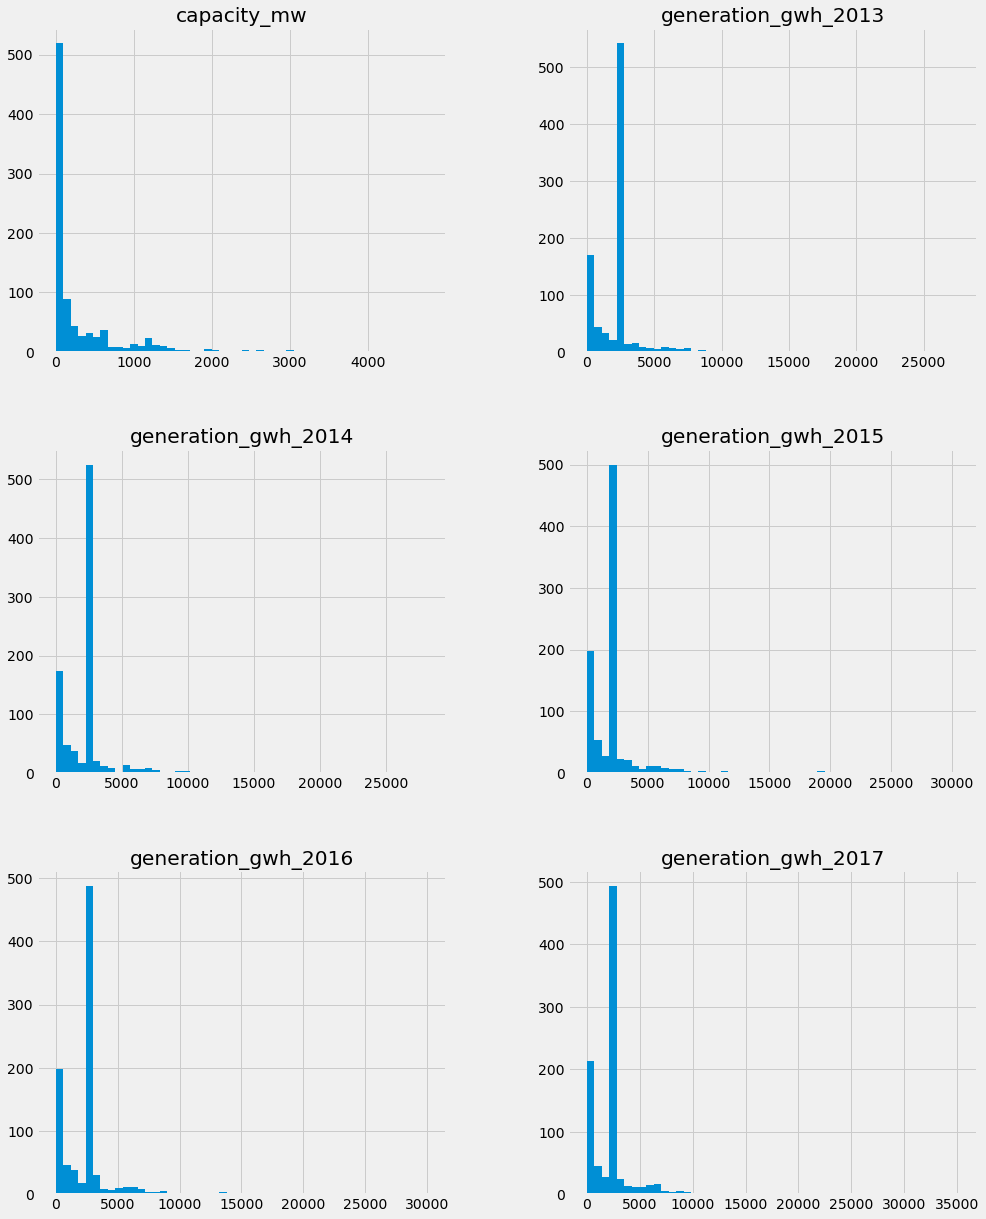

In [27]:
df.hist(figsize=(15,20),bins=50)
plt.show()

In [28]:
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [29]:
# checking the columns of the data
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [30]:
df['primary_fuel'].replace(['Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'],[1,2,3,4,5,6,7,8],inplace=True)

In [31]:
df['primary_fuel'].value_counts()

1    259
2    250
3    127
4    123
5     69
6     50
7     21
8      9
Name: primary_fuel, dtype: int64

In [32]:
features = df.drop('primary_fuel', axis =1)

target = df[['primary_fuel']]

In [33]:
features.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [36]:
target.columns

Index(['primary_fuel'], dtype='object')

In [37]:
target.sample(5)

,primary_fuel
330,2
425,4
350,2
199,3
258,6


In [40]:
y=target

In [41]:
x=features

In [49]:
x = x.drop('name', axis =1)

In [50]:
x = x.drop('gppd_idnr', axis =1)

# Model Development, Training & Evaluation

In [51]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(635, 6)
(635, 1)
(273, 6)
(273, 1)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)

# predicting the  test set results
y_pred_lr = model1.predict(x_test)
print(y_pred_lr)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred_lr)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred_lr))

[[3.11246319]
 [1.65885567]
 [3.56035229]
 [3.1299325 ]
 [3.05562969]
 [0.9491961 ]
 [3.11828629]
 [2.57798658]
 [1.81257988]
 [2.74819779]
 [3.97869709]
 [1.44910713]
 [1.63011744]
 [3.06005525]
 [3.12271185]
 [2.1999014 ]
 [3.12847672]
 [3.09010247]
 [3.13109712]
 [2.27943826]
 [3.11653936]
 [2.4109164 ]
 [2.37925598]
 [3.11712167]
 [2.91826389]
 [1.33463056]
 [3.12178015]
 [3.10314622]
 [3.12119784]
 [2.85311742]
 [1.93835034]
 [3.09476095]
 [2.77984769]
 [3.0909177 ]
 [2.47649385]
 [2.65243853]
 [3.1078047 ]
 [3.13226174]
 [3.054698  ]
 [3.11805337]
 [3.07705872]
 [2.67793272]
 [0.91797267]
 [2.80425894]
 [2.46435296]
 [2.99017801]
 [2.66799899]
 [3.12410939]
 [2.86570442]
 [3.11712167]
 [3.13016542]
 [2.13432743]
 [2.54587058]
 [3.04386703]
 [2.53863422]
 [3.13226174]
 [3.13109712]
 [3.12876788]
 [1.79830927]
 [3.08800615]
 [3.12643863]
 [0.5685741 ]
 [3.10582485]
 [3.13459098]
 [2.24748032]
 [1.84361637]
 [2.6973386 ]
 [3.13459098]
 [2.06756436]
 [3.12527401]
 [3.1299325 ]
 [2.99

In [53]:
#AdaBoost Regressor

In [54]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1.6185614817275407


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[3.6681606  1.26856391 5.82196327 3.03773132 3.1171357  3.14315412
 3.0681647  2.34510122 2.32669493 3.8519873  4.14745284 1.07674027
 1.05310228 3.1171357  3.17871998 1.83592601 3.03773132 3.09614264
 2.66827262 1.15361687 4.13591205 2.30086581 4.47478169 4.13591205
 2.59599722 1.07674027 3.17871998 3.82666899 3.71010712 2.12949338
 1.98749777 3.09614264 3.07458855 3.09614264 2.58615632 5.46281698
 3.80115581 3.16174117 3.1171357  3.0681647  3.14480474 1.96233604
 1.05367282 2.64981225 2.91282529 3.05298072 1.88608432 3.36378491
 1.9630073  4.13591205 3.03773132 1.31275295 0.95507766 3.1171357
 1.99650975 3.16174117 2.66827262 3.03773132 3.90164858 3.09614264
 3.38578679 1.07674027 3.35103895 3.12693078 1.98205481 1.07674027
 2.16709152 3.12693078 1.23852595 2.86993679 3.03773132 3.05298072
 3.36378491 3.80115581 2.10850032 3.36378491 3.14480474 2.38853175
 1.88066222 1.07674027 3.61421711 3.16174117 2.40555436 3.35020014
 3.83344136 2.17191685 4.93269948 3.22338622 3.07885625 1.36723

ValueError: Unable to coerce to Series, length must be 1: given 273

In [56]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred_rf = model.predict(x_test)
print(y_pred_rf)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred_rf)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred_rf))

print("Result :",model.score(x_train, y_train))

[3.66015311 1.33946556 5.79921144 3.04044148 3.11975678 3.66862063
 3.02953606 2.41082427 2.30483127 3.81887175 3.57354736 1.05418094
 1.04751049 3.11975678 3.18143468 1.8576059  3.04044148 3.08943079
 2.67098278 1.14398256 4.1594793  2.37536129 4.5108323  4.1594793
 2.49488744 1.05418094 3.18143468 3.81956192 3.77584451 2.15864541
 1.94465837 3.08943079 2.92731862 3.08943079 2.46689065 5.3770386
 3.79314825 3.16445134 3.11975678 3.02953606 3.11975678 1.97109448
 1.04630305 2.66688149 2.88952068 2.95482774 1.89616598 3.36649962
 1.94741134 4.1594793  3.04044148 1.30732538 0.94486583 3.11975678
 1.94321927 3.16445134 2.67098278 3.04044148 5.08091639 3.08943079
 3.38849696 1.05418094 3.63932501 3.12964095 1.96298673 1.05418094
 2.14967588 3.12964095 1.30208704 2.87264696 3.04044148 2.95482774
 3.36649962 3.79314825 2.12831942 3.36649962 3.11975678 2.23324634
 1.87153231 1.05418094 3.73031207 3.16445134 2.44141457 3.47114603
 3.95067235 2.14901457 4.92884678 3.08943079 3.08449964 1.489024

In [57]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[3.6        1.         5.         2.96428571 7.         5.
 2.625      1.         2.         2.         7.         1.
 1.         4.         3.33333333 1.         4.         3.14285714
 2.         1.         4.33333333 5.         5.         4.4
 1.         1.         2.33333333 4.5        6.         2.
 1.         2.33333333 5.         4.         5.         5.
 4.28571429 3.2        7.         2.625      4.         1.
 1.         2.         2.         2.         2.         3.53333333
 2.         4.4        2.96428571 1.         1.         4.
 1.         3.2        2.         3.         5.         3.14285714
 4.         1.         1.         3.         3.         1.
 5.         3.         1.         2.5        2.96428571 2.
 4.         4.         2.         3.53333333 2.875      5.
 2.         1.         1.83333333 3.         2.         1.
 1.         2.         7.         4.         5.         1.
 1.         2.         2.96428571 4.         1.         5.
 2.5        2.         2.      

ValueError: Unable to coerce to Series, length must be 1: given 273

In [58]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1.5861922168178568


# Model Saving

In [60]:
import pickle
filename= 'Global_power.pkl'
pickle.dump(model4,open (filename,'wb'))